Data points loaded for brisbane: 11
Data points loaded for nazca: 10
Data points loaded for sherbrooke: 11

Computer: brisbane
Pearson correlation: 0.1106 (p=0.7462)
Spearman correlation: 0.1598 (p=0.6388)

Computer: nazca
Pearson correlation: -0.0322 (p=0.9296)
Spearman correlation: 0.0367 (p=0.9198)

Computer: sherbrooke
Pearson correlation: 0.3982 (p=0.2251)
Spearman correlation: 0.4100 (p=0.2104)

Plot saved as 'tvd_vs_time_of_day.png'


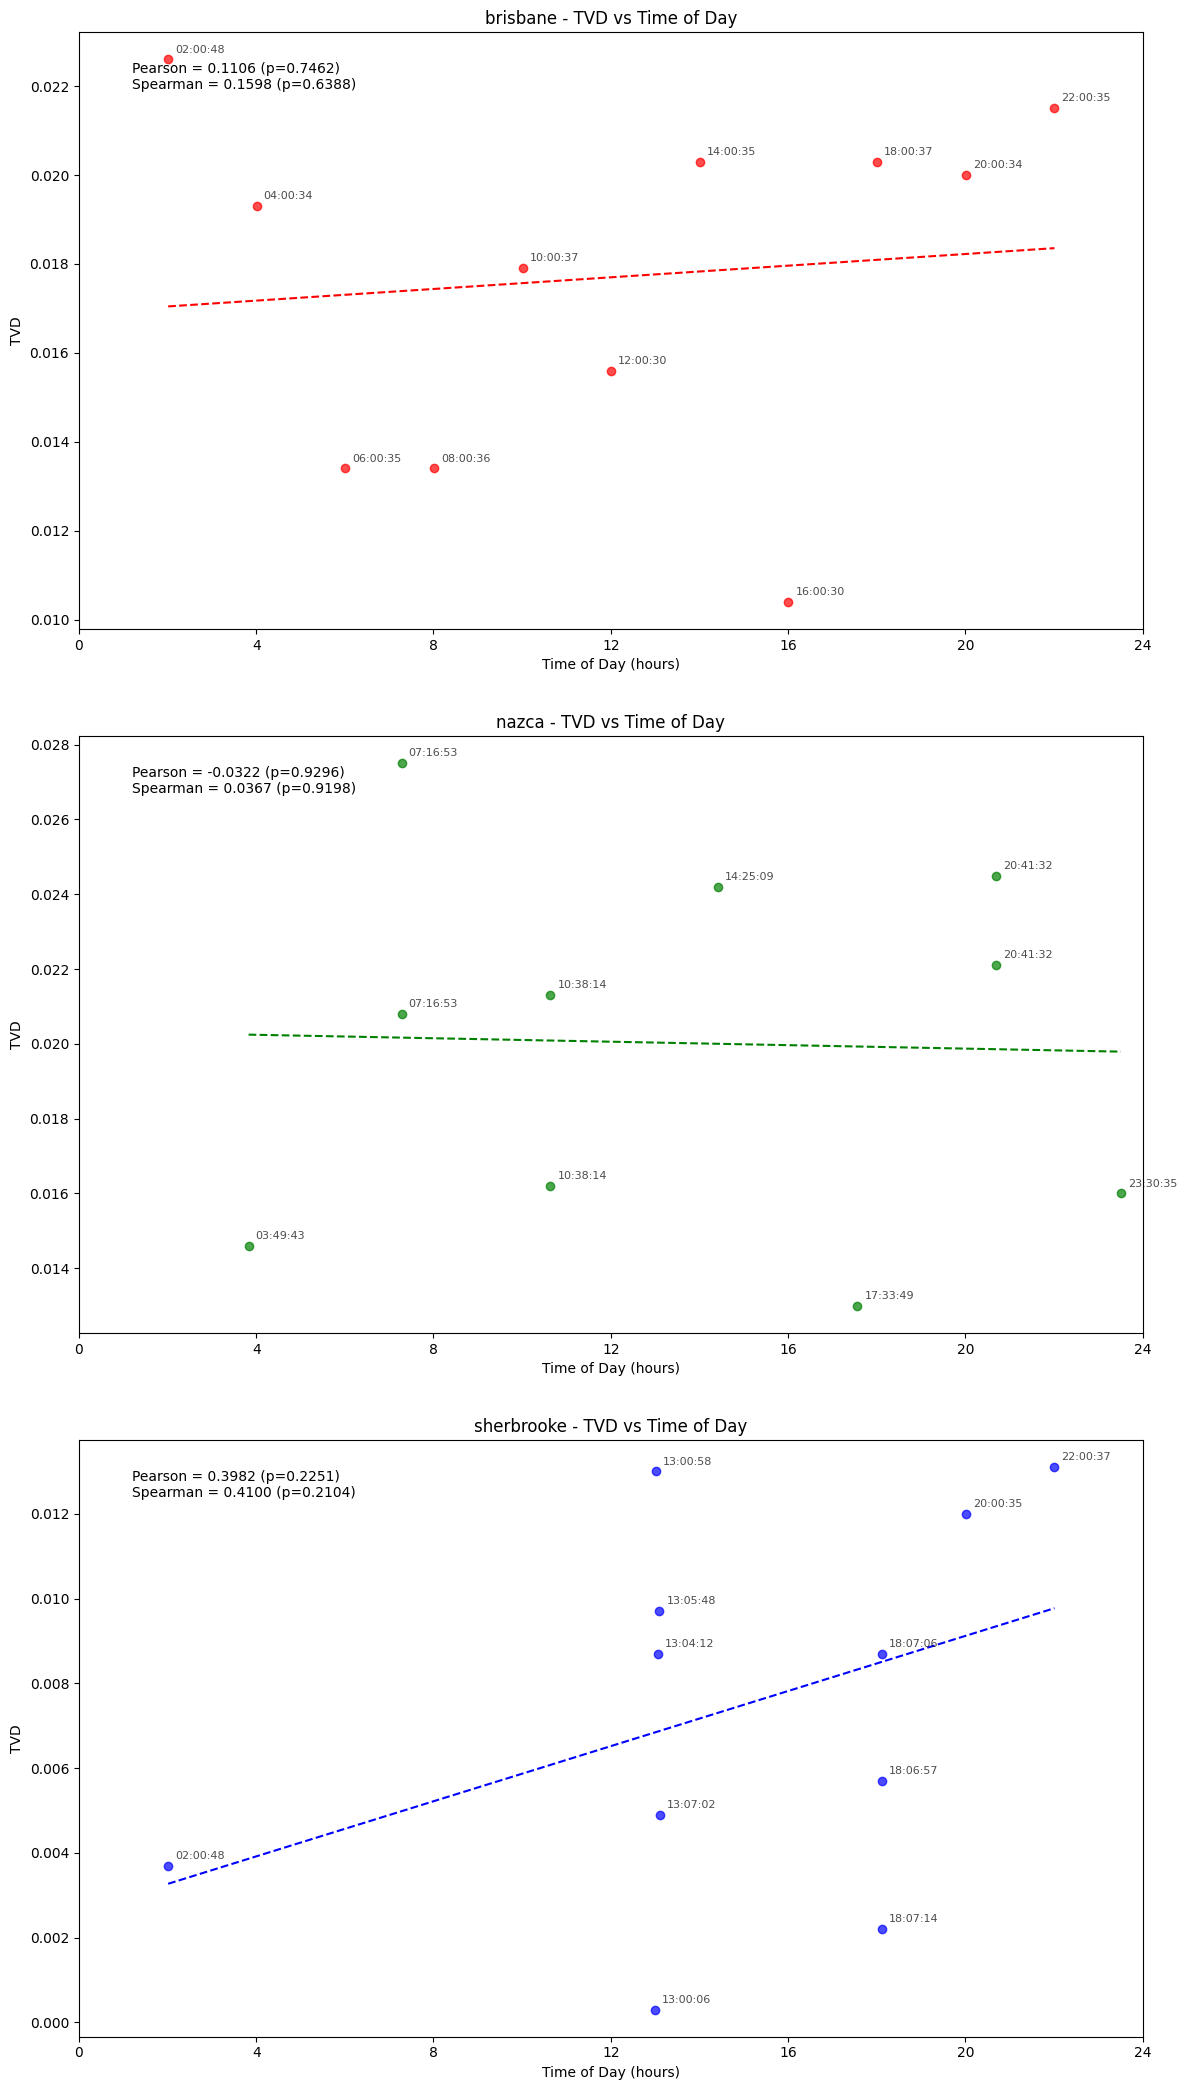

In [10]:
import os
import json
import datetime
from collections import defaultdict
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

IDEAL_DISTRIBUTION = {"1": 0.5091, "0": 0.4909}

def calculate_tvd(distribution):
    total = sum(distribution.values())
    normalized_dist = {k: v / total for k, v in distribution.items()}
    return 0.5 * sum(abs(normalized_dist.get(k, 0) - IDEAL_DISTRIBUTION.get(k, 0)) for k in set(normalized_dist) | set(IDEAL_DISTRIBUTION))

def load_data(base_directory):
    data = defaultdict(list)
    
    for file in os.listdir(base_directory):
        if file.startswith('group_D_ibm_') and file.endswith('_results.json'):
            file_path = os.path.join(base_directory, file)
            computer = file.split('_')[3]
            with open(file_path, 'r') as f:
                results = json.load(f)
                if isinstance(results, list) and len(results) > 0:
                    result = results[0]
                    if 'counts' in result and 'run_start_time' in result:
                        distribution = result['counts']
                        tvd = calculate_tvd(distribution)
                        run_start_time = datetime.datetime.strptime(result['run_start_time'], "%Y-%m-%dT%H:%M:%S.%fZ")
                        # Adjust time by subtracting 4 hours
                        adjusted_time = run_start_time - datetime.timedelta(hours=5)
                        # Extract time of day in hours (float)
                        time_of_day = adjusted_time.hour + adjusted_time.minute / 60 + adjusted_time.second / 3600
                        data[computer].append((time_of_day, tvd, adjusted_time))
    
    for computer, points in data.items():
        print(f"Data points loaded for {computer}: {len(points)}")
    return data

def analyze_and_plot(data):
    fig, axs = plt.subplots(len(data), 1, figsize=(12, 7*len(data)), sharex=False)
    if len(data) == 1:
        axs = [axs]  # Ensure axs is always a list
    colors = ['red', 'green', 'blue']
    
    for i, (computer, points) in enumerate(data.items()):
        times, tvd_values, adjusted_times = zip(*sorted(points))
        
        ax = axs[i]
        scatter = ax.scatter(times, tvd_values, label=computer, color=colors[i], alpha=0.7)
        ax.set_ylabel('TVD')
        ax.set_title(f'{computer} - TVD vs Time of Day')
        
        # Add text labels for adjusted times
        for x, y, t in zip(times, tvd_values, adjusted_times):
            ax.annotate(t.strftime('%H:%M:%S'), (x, y), xytext=(5, 5), 
                        textcoords='offset points', fontsize=8, alpha=0.7)
        
        # Perform linear regression and calculate Pearson correlation
        slope, intercept, r_value, p_value, std_err = stats.linregress(times, tvd_values)
        line = slope * np.array(times) + intercept
        ax.plot(times, line, color=colors[i], linestyle='--')
        
        # Calculate Spearman correlation
        spearman_corr, spearman_p = stats.spearmanr(times, tvd_values)
        
        # Add text with updated statistics
        ax.text(0.05, 0.95, 
                f"Pearson = {r_value:.4f} (p={p_value:.4f})\n"
                f"Spearman = {spearman_corr:.4f} (p={spearman_p:.4f})", 
                transform=ax.transAxes, verticalalignment='top', fontsize=10)
        
        print(f"\nComputer: {computer}")
        print(f"Pearson correlation: {r_value:.4f} (p={p_value:.4f})")
        print(f"Spearman correlation: {spearman_corr:.4f} (p={spearman_p:.4f})")

        # Ensure x-axis is set for each subplot
        ax.set_xlim(0, 24)
        ax.set_xticks(range(0, 25, 4))
        ax.set_xticklabels(range(0, 25, 4))
        ax.set_xlabel('Time of Day (hours)')
        
    # Adjust layout to prevent overlapping
    plt.tight_layout(h_pad=3.0)  # Increase vertical spacing between subplots
    
    # Save the figure with a higher DPI for better quality
    plt.savefig('tvd_vs_time_of_day.png', dpi=300, bbox_inches='tight')
    print("\nPlot saved as 'tvd_vs_time_of_day.png'")
    
def main():
    base_directory = os.getcwd()
    data = load_data(base_directory)
    if not data:
        print("No data found. Please check your data files.")
        return
    analyze_and_plot(data)

if __name__ == "__main__":
    main()

Data points loaded for brisbane: 11
Data points loaded for nazca: 10
Data points loaded for sherbrooke: 11

Computer: brisbane
Original data points: 11
Aggregated data points: 11
Pearson correlation: 0.1106 (p=0.7462)
Spearman correlation: 0.1598 (p=0.6388)

Computer: nazca
Original data points: 10
Aggregated data points: 7
Pearson correlation: 0.3112 (p=0.4968)
Spearman correlation: 0.1786 (p=0.7017)

Computer: sherbrooke
Original data points: 11
Aggregated data points: 5
Pearson correlation: 0.8056 (p=0.0998)
Spearman correlation: 0.9000 (p=0.0374)

Plot saved as 'tvd_vs_time_of_day_aggregated.png'


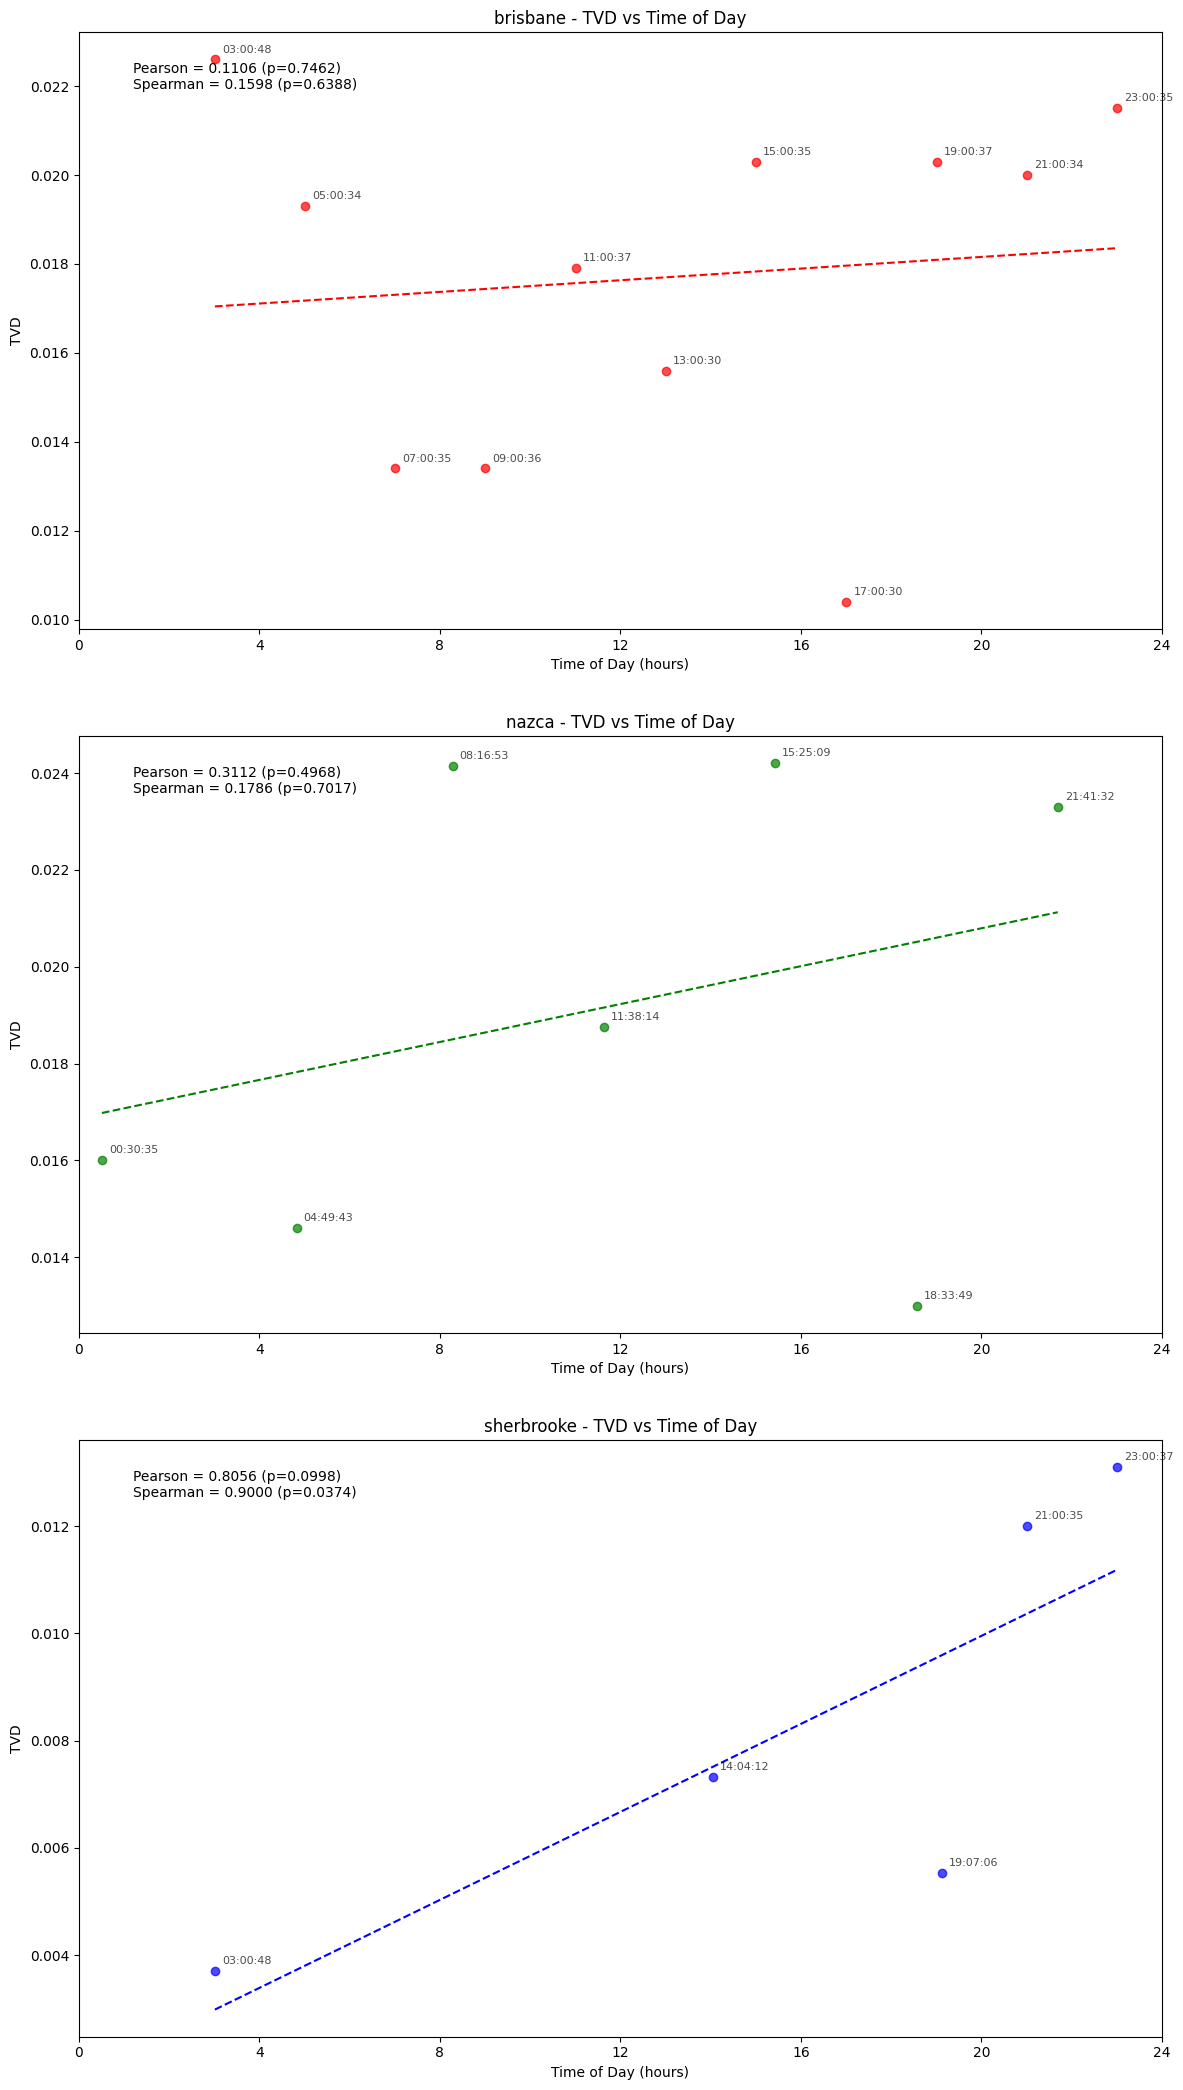

In [11]:
import os
import json
import datetime
from collections import defaultdict
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

IDEAL_DISTRIBUTION = {"1": 0.5091, "0": 0.4909}

def calculate_tvd(distribution):
    total = sum(distribution.values())
    normalized_dist = {k: v / total for k, v in distribution.items()}
    return 0.5 * sum(abs(normalized_dist.get(k, 0) - IDEAL_DISTRIBUTION.get(k, 0)) for k in set(normalized_dist) | set(IDEAL_DISTRIBUTION))

def load_data(base_directory):
    data = defaultdict(list)
    
    for file in os.listdir(base_directory):
        if file.startswith('group_D_ibm_') and file.endswith('_results.json'):
            file_path = os.path.join(base_directory, file)
            computer = file.split('_')[3]
            with open(file_path, 'r') as f:
                results = json.load(f)
                if isinstance(results, list) and len(results) > 0:
                    result = results[0]
                    if 'counts' in result and 'run_start_time' in result:
                        distribution = result['counts']
                        tvd = calculate_tvd(distribution)
                        run_start_time = datetime.datetime.strptime(result['run_start_time'], "%Y-%m-%dT%H:%M:%S.%fZ")
                        # Adjust time by subtracting 4 hours
                        adjusted_time = run_start_time - datetime.timedelta(hours=4)
                        # Extract time of day in hours (float)
                        time_of_day = adjusted_time.hour + adjusted_time.minute / 60 + adjusted_time.second / 3600
                        data[computer].append((time_of_day, tvd, adjusted_time))
    
    for computer, points in data.items():
        print(f"Data points loaded for {computer}: {len(points)}")
    return data

def aggregate_nearby_points(points, time_threshold=15/60):  # 15 minutes in hours
    sorted_points = sorted(points)
    aggregated_points = []
    current_group = []

    for point in sorted_points:
        if not current_group or point[0] - current_group[0][0] <= time_threshold:
            current_group.append(point)
        else:
            avg_time = sum(p[0] for p in current_group) / len(current_group)
            avg_tvd = sum(p[1] for p in current_group) / len(current_group)
            avg_datetime = current_group[len(current_group)//2][2]  # Use middle point's datetime
            aggregated_points.append((avg_time, avg_tvd, avg_datetime))
            current_group = [point]

    if current_group:
        avg_time = sum(p[0] for p in current_group) / len(current_group)
        avg_tvd = sum(p[1] for p in current_group) / len(current_group)
        avg_datetime = current_group[len(current_group)//2][2]  # Use middle point's datetime
        aggregated_points.append((avg_time, avg_tvd, avg_datetime))

    return aggregated_points

def analyze_and_plot(data):
    fig, axs = plt.subplots(len(data), 1, figsize=(12, 7*len(data)), sharex=False)
    if len(data) == 1:
        axs = [axs]  # Ensure axs is always a list
    colors = ['red', 'green', 'blue']
    
    for i, (computer, points) in enumerate(data.items()):
        # Aggregate nearby points
        aggregated_points = aggregate_nearby_points(points)
        times, tvd_values, adjusted_times = zip(*aggregated_points)
        
        ax = axs[i]
        scatter = ax.scatter(times, tvd_values, label=computer, color=colors[i], alpha=0.7)
        ax.set_ylabel('TVD')
        ax.set_title(f'{computer} - TVD vs Time of Day')
        
        # Add text labels for adjusted times
        for x, y, t in zip(times, tvd_values, adjusted_times):
            ax.annotate(t.strftime('%H:%M:%S'), (x, y), xytext=(5, 5), 
                        textcoords='offset points', fontsize=8, alpha=0.7)
        
        # Perform linear regression and calculate Pearson correlation
        slope, intercept, r_value, p_value, std_err = stats.linregress(times, tvd_values)
        line = slope * np.array(times) + intercept
        ax.plot(times, line, color=colors[i], linestyle='--')
        
        # Calculate Spearman correlation
        spearman_corr, spearman_p = stats.spearmanr(times, tvd_values)
        
        # Add text with updated statistics
        ax.text(0.05, 0.95, 
                f"Pearson = {r_value:.4f} (p={p_value:.4f})\n"
                f"Spearman = {spearman_corr:.4f} (p={spearman_p:.4f})", 
                transform=ax.transAxes, verticalalignment='top', fontsize=10)
        
        print(f"\nComputer: {computer}")
        print(f"Original data points: {len(points)}")
        print(f"Aggregated data points: {len(aggregated_points)}")
        print(f"Pearson correlation: {r_value:.4f} (p={p_value:.4f})")
        print(f"Spearman correlation: {spearman_corr:.4f} (p={spearman_p:.4f})")

        # Ensure x-axis is set for each subplot
        ax.set_xlim(0, 24)
        ax.set_xticks(range(0, 25, 4))
        ax.set_xticklabels(range(0, 25, 4))
        ax.set_xlabel('Time of Day (hours)')
        
    # Adjust layout to prevent overlapping
    plt.tight_layout(h_pad=3.0)  # Increase vertical spacing between subplots
    
    # Save the figure with a higher DPI for better quality
    plt.savefig('tvd_vs_time_of_day_aggregated.png', dpi=300, bbox_inches='tight')
    print("\nPlot saved as 'tvd_vs_time_of_day_aggregated.png'")

def main():
    base_directory = os.getcwd()
    data = load_data(base_directory)
    if not data:
        print("No data found. Please check your data files.")
        return
    analyze_and_plot(data)

if __name__ == "__main__":
    main()

Data points loaded for brisbane: 11
Data points loaded for nazca: 10
Data points loaded for sherbrooke: 11

Computer: brisbane
Original data points: 11
Aggregated data points: 11
TVD vs Time - Pearson correlation: 0.1106 (p=0.7462)
TVD vs Time - Spearman correlation: 0.1598 (p=0.6388)
TVD vs Duration - Pearson correlation: -0.0619 (p=0.8564)
TVD vs Duration - Spearman correlation: -0.2100 (p=0.5353)

Computer: nazca
Original data points: 10
Aggregated data points: 7
TVD vs Time - Pearson correlation: 0.3112 (p=0.4968)
TVD vs Time - Spearman correlation: 0.1786 (p=0.7017)
TVD vs Duration - Pearson correlation: 0.4626 (p=0.2960)
TVD vs Duration - Spearman correlation: 0.4286 (p=0.3374)

Computer: sherbrooke
Original data points: 11
Aggregated data points: 5
TVD vs Time - Pearson correlation: 0.8056 (p=0.0998)
TVD vs Time - Spearman correlation: 0.9000 (p=0.0374)
TVD vs Duration - Pearson correlation: -0.0431 (p=0.9451)
TVD vs Duration - Spearman correlation: 0.5000 (p=0.3910)

Plot saved

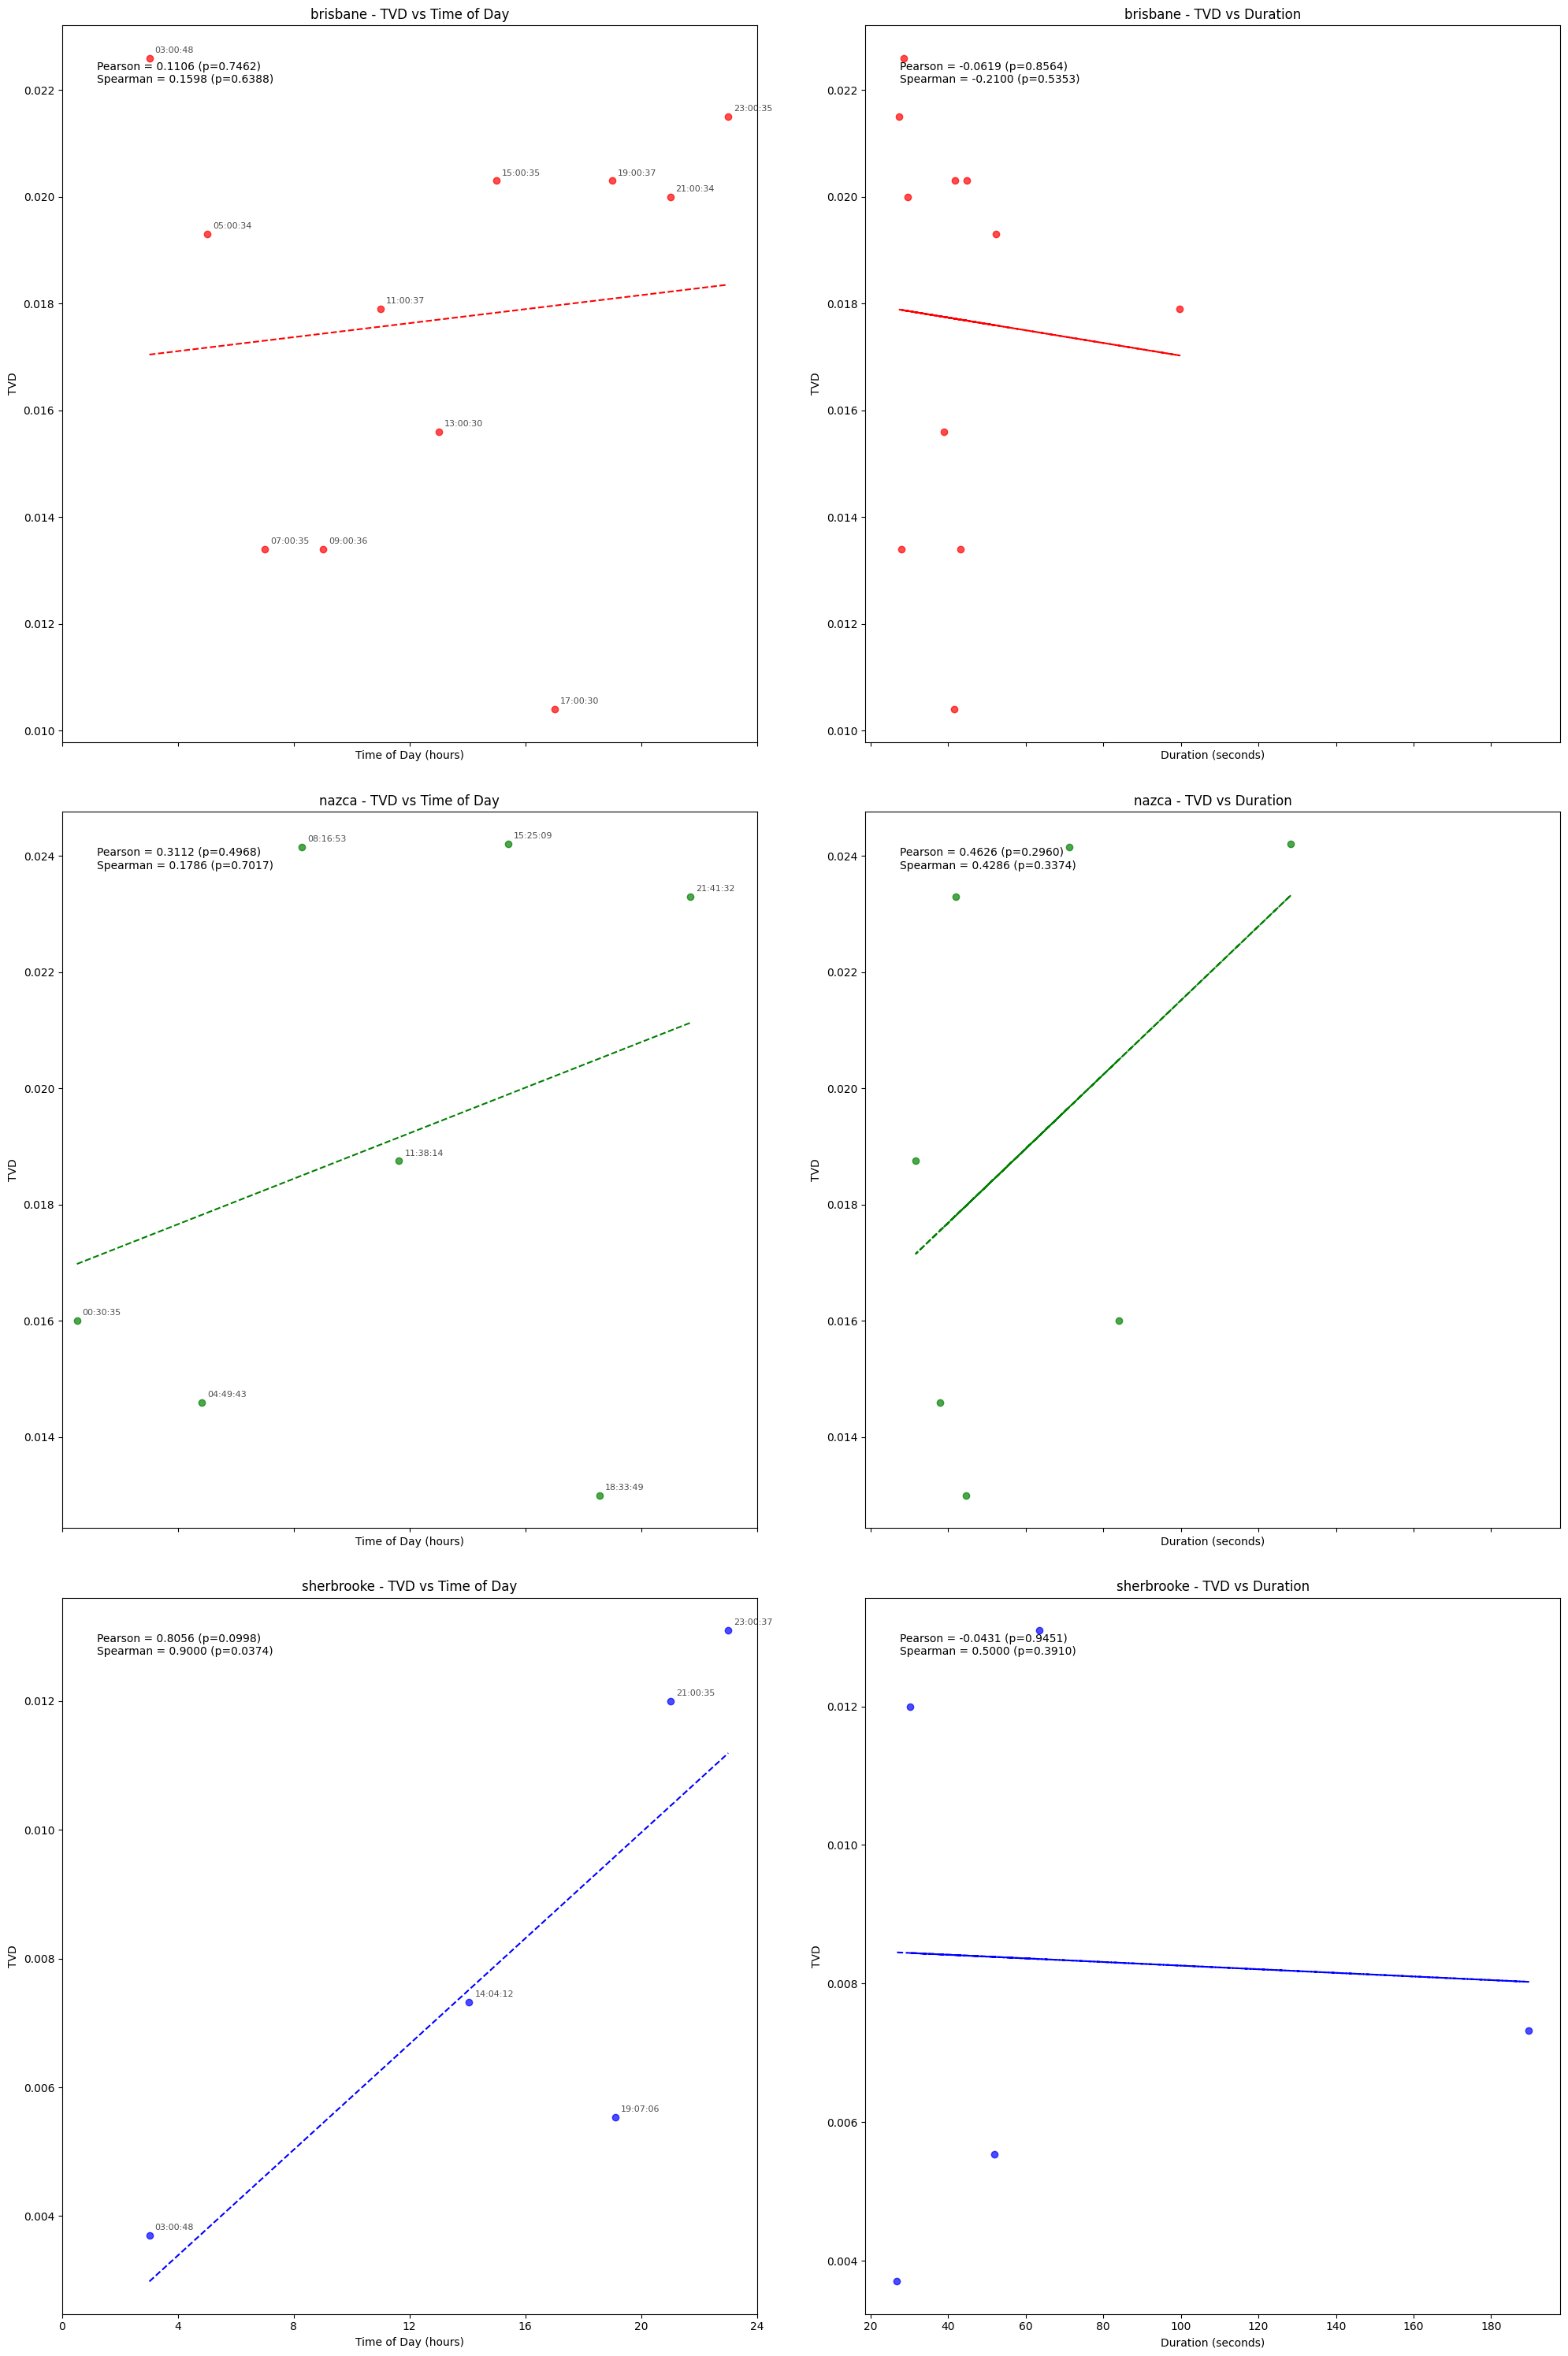

In [15]:
import os
import json
import datetime
from collections import defaultdict
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

IDEAL_DISTRIBUTION = {"1": 0.5091, "0": 0.4909}

def calculate_tvd(distribution):
    total = sum(distribution.values())
    normalized_dist = {k: v / total for k, v in distribution.items()}
    return 0.5 * sum(abs(normalized_dist.get(k, 0) - IDEAL_DISTRIBUTION.get(k, 0)) for k in set(normalized_dist) | set(IDEAL_DISTRIBUTION))

def load_data(base_directory):
    data = defaultdict(list)
    
    for file in os.listdir(base_directory):
        if file.startswith('group_D_ibm_') and file.endswith('_results.json'):
            file_path = os.path.join(base_directory, file)
            computer = file.split('_')[3]
            with open(file_path, 'r') as f:
                results = json.load(f)
                if isinstance(results, list) and len(results) > 0:
                    result = results[0]
                    if 'counts' in result and 'run_start_time' in result and 'completion_time' in result:
                        distribution = result['counts']
                        tvd = calculate_tvd(distribution)
                        run_start_time = datetime.datetime.strptime(result['run_start_time'], "%Y-%m-%dT%H:%M:%S.%fZ")
                        completion_time = datetime.datetime.strptime(result['completion_time'], "%Y-%m-%dT%H:%M:%S.%fZ")
                        duration = (completion_time - run_start_time).total_seconds()
                        # Adjust time by subtracting 4 hours
                        adjusted_time = run_start_time - datetime.timedelta(hours=4)
                        # Extract time of day in hours (float)
                        time_of_day = adjusted_time.hour + adjusted_time.minute / 60 + adjusted_time.second / 3600
                        data[computer].append((time_of_day, tvd, adjusted_time, duration))
    
    for computer, points in data.items():
        print(f"Data points loaded for {computer}: {len(points)}")
    return data

def aggregate_nearby_points(points, time_threshold=15/60):  # 15 minutes in hours
    sorted_points = sorted(points)
    aggregated_points = []
    current_group = []

    for point in sorted_points:
        if not current_group or point[0] - current_group[0][0] <= time_threshold:
            current_group.append(point)
        else:
            avg_time = sum(p[0] for p in current_group) / len(current_group)
            avg_tvd = sum(p[1] for p in current_group) / len(current_group)
            avg_datetime = current_group[len(current_group)//2][2]  # Use middle point's datetime
            avg_duration = sum(p[3] for p in current_group) / len(current_group)
            aggregated_points.append((avg_time, avg_tvd, avg_datetime, avg_duration))
            current_group = [point]

    if current_group:
        avg_time = sum(p[0] for p in current_group) / len(current_group)
        avg_tvd = sum(p[1] for p in current_group) / len(current_group)
        avg_datetime = current_group[len(current_group)//2][2]  # Use middle point's datetime
        avg_duration = sum(p[3] for p in current_group) / len(current_group)
        aggregated_points.append((avg_time, avg_tvd, avg_datetime, avg_duration))

    return aggregated_points

def analyze_and_plot(data):
    fig, axs = plt.subplots(len(data), 2, figsize=(20, 10*len(data)), sharex='col')
    if len(data) == 1:
        axs = [axs]  # Ensure axs is always a 2D array
    colors = ['red', 'green', 'blue']
    
    for i, (computer, points) in enumerate(data.items()):
        # Aggregate nearby points
        aggregated_points = aggregate_nearby_points(points)
        times, tvd_values, adjusted_times, durations = zip(*aggregated_points)
        
        # Plot TVD vs Time of Day
        ax1 = axs[i][0]
        ax1.scatter(times, tvd_values, label=computer, color=colors[i], alpha=0.7)
        ax1.set_ylabel('TVD')
        ax1.set_title(f'{computer} - TVD vs Time of Day')
        
        # Add text labels for adjusted times
        for x, y, t in zip(times, tvd_values, adjusted_times):
            ax1.annotate(t.strftime('%H:%M:%S'), (x, y), xytext=(5, 5), 
                         textcoords='offset points', fontsize=8, alpha=0.7)
        
        # Calculate Pearson correlation for TVD vs Time
        r_value, p_value = stats.pearsonr(times, tvd_values)
        
        # Calculate and plot the line of best fit
        slope, intercept = np.polyfit(times, tvd_values, 1)
        line = slope * np.array(times) + intercept
        ax1.plot(times, line, color=colors[i], linestyle='--')
        
        # Calculate Spearman correlation for TVD vs Time
        spearman_corr, spearman_p = stats.spearmanr(times, tvd_values)
        
        # Add text with updated statistics for TVD vs Time
        ax1.text(0.05, 0.95, 
                 f"Pearson = {r_value:.4f} (p={p_value:.4f})\n"
                 f"Spearman = {spearman_corr:.4f} (p={spearman_p:.4f})", 
                 transform=ax1.transAxes, verticalalignment='top', fontsize=10)
        
        # Set x-axis for TVD vs Time plot
        ax1.set_xlim(0, 24)
        ax1.set_xticks(range(0, 25, 4))
        ax1.set_xticklabels(range(0, 25, 4))
        ax1.set_xlabel('Time of Day (hours)')
        
        # Plot TVD vs Duration
        ax2 = axs[i][1]
        ax2.scatter(durations, tvd_values, label=computer, color=colors[i], alpha=0.7)
        ax2.set_ylabel('TVD')
        ax2.set_xlabel('Duration (seconds)')
        ax2.set_title(f'{computer} - TVD vs Duration')
        
        # Calculate Pearson correlation for TVD vs Duration
        r_value_dur, p_value_dur = stats.pearsonr(durations, tvd_values)
        
        # Calculate and plot the line of best fit for TVD vs Duration
        slope_dur, intercept_dur = np.polyfit(durations, tvd_values, 1)
        line_dur = slope_dur * np.array(durations) + intercept_dur
        ax2.plot(durations, line_dur, color=colors[i], linestyle='--')
        
        # Calculate Spearman correlation for TVD vs Duration
        spearman_corr_dur, spearman_p_dur = stats.spearmanr(durations, tvd_values)
        
        # Add text with updated statistics for TVD vs Duration
        ax2.text(0.05, 0.95, 
                 f"Pearson = {r_value_dur:.4f} (p={p_value_dur:.4f})\n"
                 f"Spearman = {spearman_corr_dur:.4f} (p={spearman_p_dur:.4f})", 
                 transform=ax2.transAxes, verticalalignment='top', fontsize=10)
        
        print(f"\nComputer: {computer}")
        print(f"Original data points: {len(points)}")
        print(f"Aggregated data points: {len(aggregated_points)}")
        print(f"TVD vs Time - Pearson correlation: {r_value:.4f} (p={p_value:.4f})")
        print(f"TVD vs Time - Spearman correlation: {spearman_corr:.4f} (p={spearman_p:.4f})")
        print(f"TVD vs Duration - Pearson correlation: {r_value_dur:.4f} (p={p_value_dur:.4f})")
        print(f"TVD vs Duration - Spearman correlation: {spearman_corr_dur:.4f} (p={spearman_p_dur:.4f})")

    # Adjust layout to prevent overlapping
    plt.tight_layout(h_pad=3.0, w_pad=3.0)  # Increase spacing between subplots
    
    # Save the figure with a higher DPI for better quality
    plt.savefig('tvd_vs_time_and_duration_aggregated.png', dpi=300, bbox_inches='tight')
    print("\nPlot saved as 'tvd_vs_time_and_duration_aggregated.png'")


def main():
    base_directory = os.getcwd()
    data = load_data(base_directory)
    if not data:
        print("No data found. Please check your data files.")
        return
    analyze_and_plot(data)

if __name__ == "__main__":
    main()